'''
<br><br>
@Author: Shivraj Yelave<br>
@Date: 9-10-24<br>
@Last modified by: Shivraj Yelave<br>
@Last modified time: <br>
@Title: Single layer neural network to  predict whether customer will exit<br>
<br>
'''


### Importing Library

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

### Loading Dataset

In [15]:
# Load the dataset
data = pd.read_csv('https://drive.google.com/uc?id=1aYpqp7vGd1vy76fhP-2IQJywn0BLt3eM')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Analize dataset

In [16]:
data.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: >

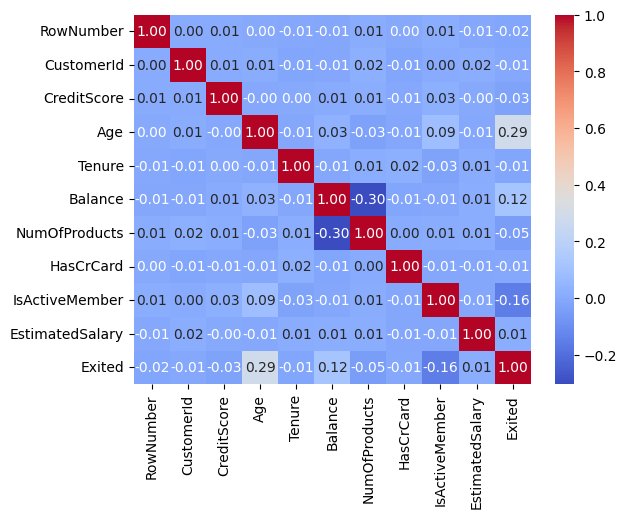

In [17]:
sns.heatmap(data[data.describe().columns].corr(),annot=True,cmap='coolwarm',fmt='.2f')

In [18]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Drop irrelevant columns


In [19]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

### Handling categorical Data

In [20]:
# Encode Categorical Variables: Geography and Gender
le_gender = LabelEncoder()
data['Gender'] = le_gender.fit_transform(data['Gender'])  # Gender: Male = 1, Female = 0

le_geo = LabelEncoder()
data['Geography'] = le_geo.fit_transform(data['Geography'])  # Encode Geography: e.g., France = 0, Germany = 1, etc.


### Spliting Dataset

In [21]:

# Define input (X) and output (y) variables
X = data.drop('Exited', axis=1).values  # Input features
y = data['Exited'].values  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### Scaling Dataset

In [22]:
# Feature scaling (Standardizing data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train.shape

(8000, 10)

### Building model

In [24]:
# Building the Artificial Neural Network (ANN)
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=1, activation='sigmoid', input_dim=X_train_scaled.shape[1]))


# Compiling the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the ANN
model.fit(X_train_scaled, y_train, epochs=15, batch_size=32, validation_split=0.2)

# Predict on the test set
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)

Epoch 1/15
200/200 [==============================] - 1s 2ms/step - loss: 0.9587 - accuracy: 0.4467 - val_loss: 0.8668 - val_accuracy: 0.4644
Epoch 2/15
200/200 [==============================] - 0s 2ms/step - loss: 0.7804 - accuracy: 0.5186 - val_loss: 0.7138 - val_accuracy: 0.5738
Epoch 3/15
200/200 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.6319 - val_loss: 0.6109 - val_accuracy: 0.6988
Epoch 4/15
200/200 [==============================] - 0s 2ms/step - loss: 0.5739 - accuracy: 0.7578 - val_loss: 0.5484 - val_accuracy: 0.7900
Epoch 5/15
200/200 [==============================] - 0s 1ms/step - loss: 0.5249 - accuracy: 0.8020 - val_loss: 0.5113 - val_accuracy: 0.8000
Epoch 6/15
200/200 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.8045 - val_loss: 0.4886 - val_accuracy: 0.7994
Epoch 7/15
200/200 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.8094 - val_loss: 0.4738 - val_accuracy: 0.8000
Epoch 

### Model Performance

In [25]:
# Confusion Matrix and Accuracy
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[1547   48]
 [ 339   66]]
Accuracy: 0.8065
